
Test Accuracy: 0.9734


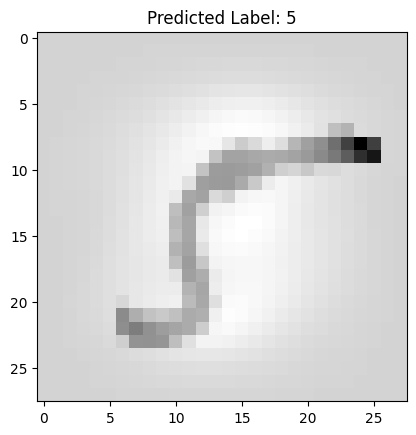

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load MNIST dataset from OpenML
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(np.uint8)  # Convert labels to integers

# Normalize pixel values (0-255 -> 0-1)
X /= 255.0

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Standardize data (mean=0, std=1) to improve training performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define and train an MLP neural network
mlp = MLPClassifier(
        hidden_layer_sizes=(512, 256, 128),
        activation='relu', 
        solver='lbfgs',
        alpha=0.0001,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        random_state=42,
        verbose=True
    )

mlp.fit(X_train, y_train)

# Evaluate the model
y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Display a test image and the model's prediction
plt.imshow(X_test[0].reshape(28, 28), cmap=plt.cm.binary)
plt.title(f"Predicted Label: {y_pred[0]}")
plt.show()
